In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict, Counter
import os
from datetime import timedelta
import plotly.express as px


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [210]:
weather_data = pd.read_csv('cleaned_weather.csv')

data = pd.read_csv('more_resource.csv')

In [211]:
weather_data.head()

,Unnamed: 0,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,water_equiv_snowfall,station_pressure,sealevel_pressure,wind_speed,wind_direction,avg_wind_speed,datetime,year,month,day,wind_direction_cos,wind_direction_sin,TS,GR,RA,DZ,SN,FG,BR,HZ,FU,SQ,MI,BC,VC,FG+,MD
0,0,1,83,50,67.0,14.0,51,56.0,0.0,2.0,448,1849,0.0,29.10,29.82,1.7,270,9.2,2007-05-01,2007,5,1,-1.836970e-16,-1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2,84,52,68.0,14.0,51,57.0,0.0,3.0,448,1849,0.0,29.18,29.82,2.7,250,9.6,2007-05-01,2007,5,1,-3.420201e-01,-0.939693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,1,59,42,51.0,-3.0,42,47.0,14.0,0.0,447,1850,0.0,29.38,30.09,13.0,40,13.4,2007-05-02,2007,5,2,7.660444e-01,0.642788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,2,60,43,52.0,-3.0,42,47.0,13.0,0.0,447,1850,0.0,29.44,30.08,13.3,20,13.4,2007-05-02,2007,5,2,9.396926e-01,0.342020,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,4,1,66,46,56.0,2.0,40,48.0,9.0,0.0,446,1851,0.0,29.39,30.12,11.7,70,11.9,2007-05-03,2007,5,3,3.420201e-01,0.939693,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [212]:
weather_data.drop(columns = ['Unnamed: 0'], inplace=True)
weather_data.head()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,water_equiv_snowfall,station_pressure,sealevel_pressure,wind_speed,wind_direction,avg_wind_speed,datetime,year,month,day,wind_direction_cos,wind_direction_sin,TS,GR,RA,DZ,SN,FG,BR,HZ,FU,SQ,MI,BC,VC,FG+,MD
0,1,83,50,67.0,14.0,51,56.0,0.0,2.0,448,1849,0.0,29.10,29.82,1.7,270,9.2,2007-05-01,2007,5,1,-1.836970e-16,-1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,84,52,68.0,14.0,51,57.0,0.0,3.0,448,1849,0.0,29.18,29.82,2.7,250,9.6,2007-05-01,2007,5,1,-3.420201e-01,-0.939693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,59,42,51.0,-3.0,42,47.0,14.0,0.0,447,1850,0.0,29.38,30.09,13.0,40,13.4,2007-05-02,2007,5,2,7.660444e-01,0.642788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2,60,43,52.0,-3.0,42,47.0,13.0,0.0,447,1850,0.0,29.44,30.08,13.3,20,13.4,2007-05-02,2007,5,2,9.396926e-01,0.342020,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,66,46,56.0,2.0,40,48.0,9.0,0.0,446,1851,0.0,29.39,30.12,11.7,70,11.9,2007-05-03,2007,5,3,3.420201e-01,0.939693,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [213]:
weather_data.dtypes

Station                   int64
Tmax                      int64
Tmin                      int64
Tavg                    float64
Depart                  float64
DewPoint                  int64
WetBulb                 float64
Heat                    float64
Cool                    float64
Sunrise                   int64
Sunset                    int64
water_equiv_snowfall    float64
station_pressure        float64
sealevel_pressure       float64
wind_speed              float64
wind_direction            int64
avg_wind_speed          float64
datetime                 object
year                      int64
month                     int64
day                       int64
wind_direction_cos      float64
wind_direction_sin      float64
TS                        int64
GR                        int64
RA                        int64
DZ                        int64
SN                        int64
FG                        int64
BR                        int64
HZ                        int64
FU      

In [214]:
def RH(dewpoint, Tf, a=6.112, b = 17.62, c=243.12, d = 234.5):
    T = (Tf-32)*(5/9)
    res = (100*np.exp((b*dewpoint)/(c+dewpoint)))/(np.exp((b-T/d)*(T/(c+T))))
    return res


weather_data['RH_avg'] = RH(weather_data['DewPoint'].values, weather_data['Tavg'].values)
weather_data['RH_max'] = RH(weather_data['DewPoint'].values, weather_data['Tmax'].values)
weather_data['RH_min'] = RH(weather_data['DewPoint'].values, weather_data['Tmin'].values)

In [215]:
weather_data.head(2)

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,water_equiv_snowfall,station_pressure,sealevel_pressure,wind_speed,wind_direction,avg_wind_speed,datetime,year,month,day,wind_direction_cos,wind_direction_sin,TS,GR,RA,DZ,SN,FG,BR,HZ,FU,SQ,MI,BC,VC,FG+,MD,RH_avg,RH_max,RH_min
0,1,83,50,67.0,14.0,51,56.0,0.0,2.0,448,1849,0.0,29.10,29.82,1.7,270,9.2,2007-05-01,2007,5,1,-1.836970e-16,-1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,579.247315,341.706454,1060.001879
1,2,84,52,68.0,14.0,51,57.0,0.0,3.0,448,1849,0.0,29.18,29.82,2.7,250,9.6,2007-05-01,2007,5,1,-3.420201e-01,-0.939693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,559.824696,331.024876,984.807903


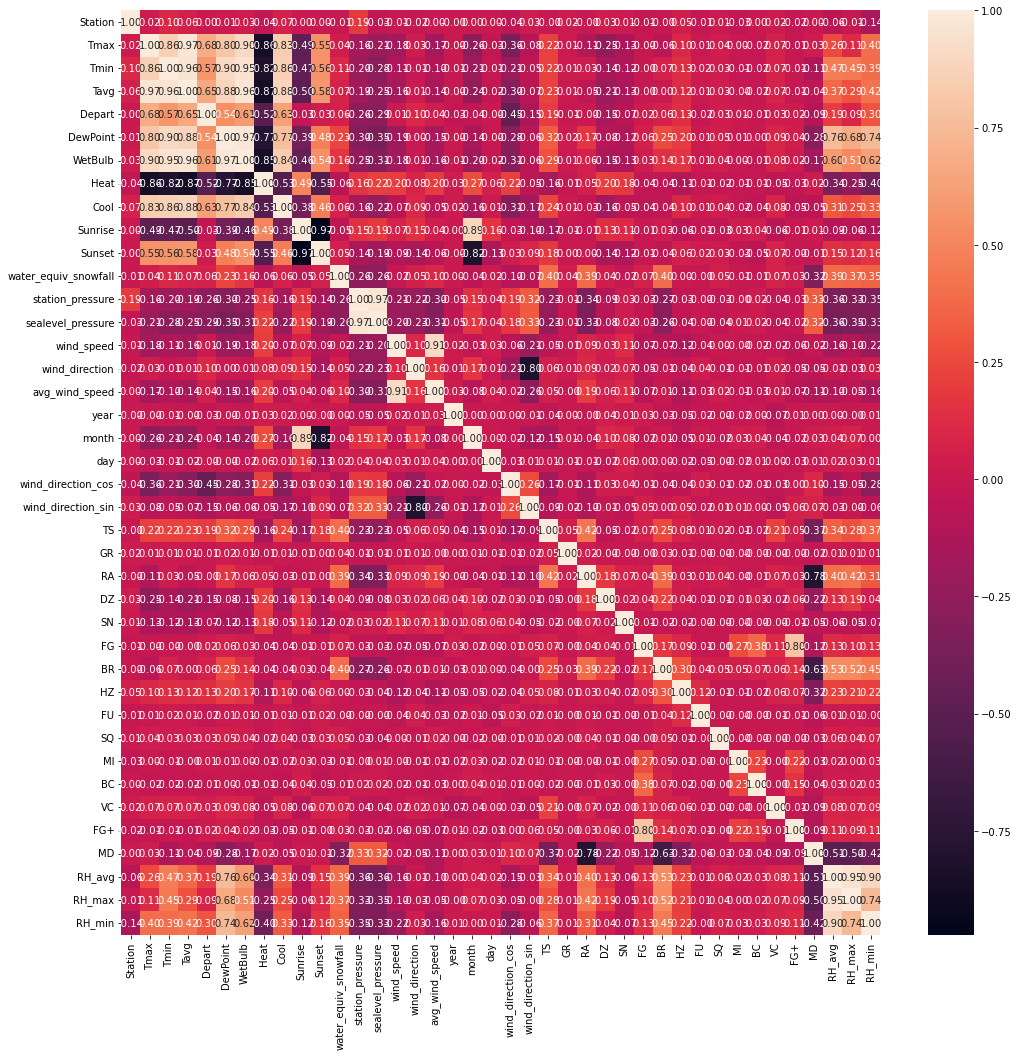

Tmax Tmin 0.8599813534867545
------------------------------------------------------------
Tmax Tavg 0.9658894825929402
------------------------------------------------------------
Tmax DewPoint 0.8017328584064062
------------------------------------------------------------
Tmax WetBulb 0.9047257427676987
------------------------------------------------------------
Tmax Heat -0.8574672510752319
------------------------------------------------------------
Tmax Cool 0.8327853298247246
------------------------------------------------------------
Tmin Tavg 0.9594445007022369
------------------------------------------------------------
Tmin DewPoint 0.9043582266987372
------------------------------------------------------------
Tmin WetBulb 0.9514769455576785
------------------------------------------------------------
Tmin Heat -0.819030354878826
------------------------------------------------------------
Tmin Cool 0.859141658181828
---------------------------------------------------------

In [216]:
corr = weather_data.drop(columns=['datetime']).corr()
high = (np.abs(corr.values)>0.8).any(axis=0)
high_corr = weather_data.drop(columns=['datetime']).loc[:,high].corr()
plt.figure(figsize=(17,17))
sns.heatmap(high_corr, annot=True, fmt='.2f')
plt.show()

high = (np.abs(corr.values)>0.8)
for i in range(high.shape[0]):
    for j in range(high.shape[1]):
        if high[i,j] and i<j:
            print(weather_data.columns[i], weather_data.columns[j], corr.values[i,j])
            print('-'*60)

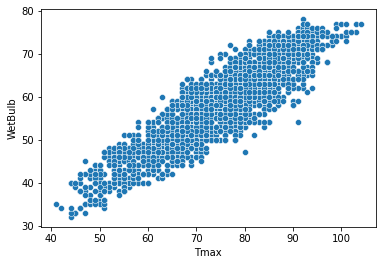

In [217]:
sns.scatterplot(data=weather_data, x='Tmax', y='WetBulb')
plt.show()

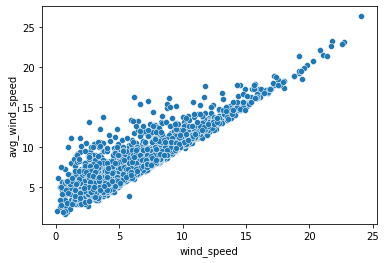

In [218]:
sns.scatterplot(data=weather_data, x='wind_speed', y='avg_wind_speed')
plt.show()

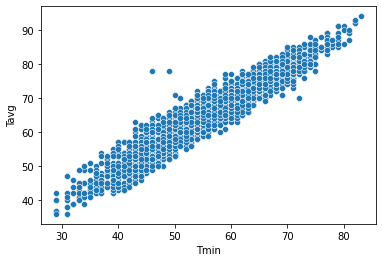

In [219]:
sns.scatterplot(data=weather_data, x='Tmin', y='Tavg')
plt.show()

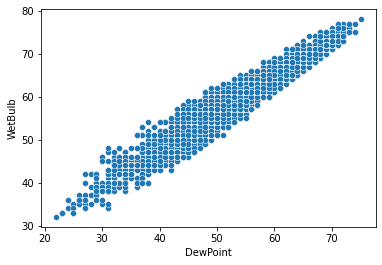

In [220]:
sns.scatterplot(data=weather_data, x='DewPoint', y='WetBulb')
plt.show()

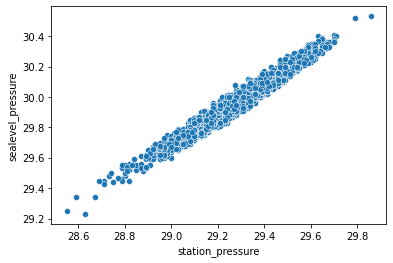

In [221]:
sns.scatterplot(data=weather_data, x='station_pressure', y='sealevel_pressure')
plt.show()

In [222]:
high_corr_drop = ['WetBulb', 'Tmax', 'Tmin', 'RH_max', 'RH_min', 'sealevel_pressure', 'wind_speed', 'Sunset', 'Sunrise']

In [223]:
weather_data.drop(columns=high_corr_drop, inplace=True)

In [224]:
ohare, midway = dict(), dict()

for lag in range(1,4):
    delta = timedelta(days=lag)
    x = weather_data.loc[weather_data.Station==1, :].copy()
    x['datetime'] = pd.to_datetime(x['datetime']) + delta
    x.drop(columns=['year', 'month', 'day', 'Station'], inplace=True)
    x['datetime']=x['datetime'].dt.strftime('%Y-%m-%d')
    ohare[lag] = x
    y = weather_data.loc[weather_data.Station==2, :].copy()
    y['datetime'] = pd.to_datetime(y['datetime']) + delta
    y.drop(columns=['year', 'month', 'day', 'Station'], inplace=True)
    y['datetime'] = y['datetime'].dt.strftime('%Y-%m-%d')
    midway[lag] = y

In [225]:
data.drop(columns = ['Unnamed: 0'], inplace=True)
data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,water_equiv_snowfall,station_pressure,sealevel_pressure,wind_speed,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,RA,DZ,FG,BR,HZ,VC,MD,lat,lon,spray_dist,has_spray,spray_lat_diff,spray_lon_diff,station_dist,station_lat_diff,station_lon_diff,pre_spray_dist,pre_has_spray,pre_spray_lat_diff,pre_spray_lon_diff,population,median_income,population_density
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29,5,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.163721,-0.000009,0.163721,1.414,0,1.0,1.0,29043,72086.0,5741.46
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007-05-29,5,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.110190,-0.020911,0.108188,1.414,0,1.0,1.0,28982,55831.0,7590.96
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007-05-29,5,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.110190,-0.020911,0.108188,1.414,0,1.0,1.0,28982,55831.0,7590.96


In [226]:
data['RH_avg'] = RH(data['DewPoint'].values, data['Tavg'].values)
data['daytime'] = data['Sunset']-data['Sunrise']

In [227]:
for feature in high_corr_drop:
    if feature in data.columns:
        data.drop(columns=[feature], inplace=True)

In [228]:
def ohare_dist(data):
    x, y = 41.995, -87.933
    return np.sqrt((data['Latitude']-x)**2+(data['Longitude']-y)**2)

def midway_dist(data):
    x, y = 41.786, -87.752
    return np.sqrt((data['Latitude']-x)**2+(data['Longitude']-y)**2)


def weather_lag_feature(data, ohare, midway):
    o_dist = ohare_dist(data)
    m_dist = midway_dist(data)
    all_col = set(col for col in data.columns)
    for lag in ohare:
        o_weather, m_weather = ohare[lag], midway[lag]
        col = [c for c in o_weather.columns if c in all_col]
        temp_o = data.merge(o_weather[col], on=['datetime'], how='left', suffixes=(None, '_'+str(lag)))
        temp_m = data.merge(m_weather[col], on=['datetime'], how='left', suffixes=(None, '_'+str(lag)))
        mask = (m_dist.values<o_dist.values)
        new_col = [c+'_'+str(lag) for c in col if c!='datetime']
        temp_o.loc[mask, new_col] = temp_m.loc[mask, new_col]
        data = temp_o
    return data    
        

In [229]:
data = weather_lag_feature(data, ohare, midway)

In [230]:
data.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,RA,DZ,FG,BR,HZ,VC,MD,lat,lon,spray_dist,has_spray,spray_lat_diff,spray_lon_diff,station_dist,station_lat_diff,station_lon_diff,pre_spray_dist,pre_has_spray,pre_spray_lat_diff,pre_spray_lon_diff,population,median_income,population_density,RH_avg,daytime,Tavg_1,Depart_1,DewPoint_1,Heat_1,Cool_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,DZ_1,FG_1,BR_1,HZ_1,VC_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,Cool_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,RA_2,DZ_2,FG_2,BR_2,HZ_2,VC_2,MD_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,RA_3,DZ_3,FG_3,BR_3,HZ_3,VC_3,MD_3,RH_avg_3
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.163721,-0.000009,0.163721,1.414,0,1.0,1.0,29043,72086.0,5741.46,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784


In [231]:
data.isna().sum().sort_values(ascending=False)

Date                      0
RH_avg_1                  0
wind_direction_sin_2      0
wind_direction_cos_2      0
avg_wind_speed_2          0
wind_direction_2          0
station_pressure_2        0
water_equiv_snowfall_2    0
Cool_2                    0
Heat_2                    0
DewPoint_2                0
Depart_2                  0
Tavg_2                    0
MD_1                      0
RA_2                      0
VC_1                      0
HZ_1                      0
BR_1                      0
FG_1                      0
DZ_1                      0
RA_1                      0
TS_1                      0
wind_direction_sin_1      0
wind_direction_cos_1      0
avg_wind_speed_1          0
wind_direction_1          0
TS_2                      0
DZ_2                      0
water_equiv_snowfall_1    0
wind_direction_3          0
MD_3                      0
VC_3                      0
HZ_3                      0
BR_3                      0
FG_3                      0
DZ_3                

In [232]:
x = data[['AddressNumberAndStreet', 'NumMosquitos', 
          'WnvPresent', 'datetime']].groupby(['datetime']).agg({'AddressNumberAndStreet':np.size, 'NumMosquitos':np.sum, 'WnvPresent':np.sum})
x['density'] = x['WnvPresent']/x['NumMosquitos']
x

,AddressNumberAndStreet,NumMosquitos,WnvPresent,density
datetime,,,,
2007-05-29,25,40,0,0.000000
2007-06-05,60,127,0,0.000000
2007-06-26,70,216,0,0.000000
2007-06-29,46,85,0,0.000000
2007-07-02,74,240,0,0.000000
2007-07-11,152,1103,0,0.000000
2007-07-18,129,853,1,0.001172
2007-07-19,45,687,0,0.000000
2007-07-25,92,4069,5,0.001229


In [233]:
def density_lag(data):
    all_dates = list(np.sort(data['datetime'].unique()))
    def helper(x, l=all_dates):
        idx = l.index(x)
        if idx<len(l)-1:
            return l[idx+1]
        return ''
    all_location = data['AddressNumberAndStreet'].unique()
    density = data[['AddressNumberAndStreet', 
          'datetime', 'NumMosquitos', 'WnvPresent']].groupby(['AddressNumberAndStreet', 'datetime']).agg({'NumMosquitos':np.sum, 'WnvPresent':np.sum}).reset_index()
    
    density['density'] = density['WnvPresent']/density['NumMosquitos']
    density['datetime'] = density['datetime'].apply(lambda x:helper(x))
    data = data.merge(density[['AddressNumberAndStreet', 'datetime', 'density']].copy(), on=['AddressNumberAndStreet', 'datetime'], how='left')
    data = data.merge(density[['AddressNumberAndStreet', 'datetime', 'NumMosquitos']].copy(), on=['AddressNumberAndStreet', 'datetime'], how='left', suffixes=(None, '_lag'))
    mask = data['density'].isna()
    density_map = density[['AddressNumberAndStreet', 'density']].groupby('AddressNumberAndStreet').agg(np.median).reset_index()
    density_map = pd.Series(data=density_map['density'].values, index = density_map['AddressNumberAndStreet'].values)
    data['density'][mask] = data['AddressNumberAndStreet'].map(density_map)[mask]
    count_map = density[['AddressNumberAndStreet', 'NumMosquitos']].groupby('AddressNumberAndStreet').agg(np.median).reset_index()
    count_map = pd.Series(data=count_map['NumMosquitos'].values, index = count_map['AddressNumberAndStreet'].values)
    data['NumMosquitos_lag'][mask] = data['AddressNumberAndStreet'].map(count_map)[mask]
    return data
    
    

In [234]:
data = density_lag(data)
data.isna().sum().sort_values(ascending=False)

C:\Users\lmaow\AppData\Local\Temp\ipykernel_8436\3565492560.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['density'][mask] = data['AddressNumberAndStreet'].map(density_map)[mask]
C:\Users\lmaow\AppData\Local\Temp\ipykernel_8436\3565492560.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumMosquitos_lag'][mask] = data['AddressNumberAndStreet'].map(count_map)[mask]


Date                      0
station_pressure_1        0
RA_2                      0
TS_2                      0
wind_direction_sin_2      0
wind_direction_cos_2      0
avg_wind_speed_2          0
wind_direction_2          0
station_pressure_2        0
water_equiv_snowfall_2    0
Cool_2                    0
Heat_2                    0
DewPoint_2                0
Depart_2                  0
Tavg_2                    0
RH_avg_1                  0
MD_1                      0
VC_1                      0
HZ_1                      0
BR_1                      0
FG_1                      0
DZ_1                      0
RA_1                      0
TS_1                      0
wind_direction_sin_1      0
wind_direction_cos_1      0
avg_wind_speed_1          0
DZ_2                      0
FG_2                      0
BR_2                      0
wind_direction_cos_3      0
density                   0
RH_avg_3                  0
MD_3                      0
VC_3                      0
HZ_3                

In [235]:
data.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,RA,DZ,FG,BR,HZ,VC,MD,lat,lon,spray_dist,has_spray,spray_lat_diff,spray_lon_diff,station_dist,station_lat_diff,station_lon_diff,pre_spray_dist,pre_has_spray,pre_spray_lat_diff,pre_spray_lon_diff,population,median_income,population_density,RH_avg,daytime,Tavg_1,Depart_1,DewPoint_1,Heat_1,Cool_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,DZ_1,FG_1,BR_1,HZ_1,VC_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,Cool_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,RA_2,DZ_2,FG_2,BR_2,HZ_2,VC_2,MD_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,RA_3,DZ_3,FG_3,BR_3,HZ_3,VC_3,MD_3,RH_avg_3,density,NumMosquitos_lag
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784,0.0,27.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784,0.0,27.0


In [236]:
data['day_of_year'] = pd.to_datetime(data['datetime']).apply(lambda x:x.timetuple().tm_yday)
data['year'] = pd.to_datetime(data['datetime']).dt.year

In [237]:
data.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,RA,DZ,FG,BR,HZ,VC,MD,lat,lon,spray_dist,has_spray,spray_lat_diff,spray_lon_diff,station_dist,station_lat_diff,station_lon_diff,pre_spray_dist,pre_has_spray,pre_spray_lat_diff,pre_spray_lon_diff,population,median_income,population_density,RH_avg,daytime,Tavg_1,Depart_1,DewPoint_1,Heat_1,Cool_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,DZ_1,FG_1,BR_1,HZ_1,VC_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,Cool_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,RA_2,DZ_2,FG_2,BR_2,HZ_2,VC_2,MD_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,RA_3,DZ_3,FG_3,BR_3,HZ_3,VC_3,MD_3,RH_avg_3,density,NumMosquitos_lag,day_of_year,year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784,0.0,27.0,149,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,41.995,-87.933,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784,0.0,27.0,149,2007


In [238]:
drop_cols = ['Date', 'Address', 'Trap', 'AddressNumberAndStreet', 
             'Latitude', 'Longitude', 'AddressAccuracy', 'datetime', 'lat', 'lon']
data.drop(columns=drop_cols, inplace=True)
data.head(2)

,Species,Block,Street,NumMosquitos,WnvPresent,month,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,RA,DZ,FG,BR,HZ,VC,MD,spray_dist,has_spray,spray_lat_diff,spray_lon_diff,station_dist,station_lat_diff,station_lon_diff,pre_spray_dist,pre_has_spray,pre_spray_lat_diff,pre_spray_lon_diff,population,median_income,population_density,RH_avg,daytime,Tavg_1,Depart_1,DewPoint_1,Heat_1,Cool_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,DZ_1,FG_1,BR_1,HZ_1,VC_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,Cool_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,RA_2,DZ_2,FG_2,BR_2,HZ_2,VC_2,MD_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,RA_3,DZ_3,FG_3,BR_3,HZ_3,VC_3,MD_3,RH_avg_3,density,NumMosquitos_lag,day_of_year,year
0,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,1,0,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784,0.0,27.0,149,2007
1,CULEX RESTUANS,41,N OAK PARK AVE,1,0,5,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,0,0,1,1,0,0,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,1.414,0,1.0,1.0,75604,55324.0,10611.96,642.111618,1496,65.0,2.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,1,0,0,1,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,1,0,0,1,1,0,0,999.126784,0.0,27.0,149,2007


In [239]:
def IV(data, feature, y):
    temp = data[feature].copy()
    all_values = data[feature].unique()
    if len(all_values)>20 and temp.dtype!='object':
        temp = pd.qcut(temp, q=20, labels=False, duplicates='drop')
        all_values = temp.unique()
    res = 0
    total_event = y.sum()
    total_non_event = y.size-total_event
    for v in all_values:
        mask = (temp.values==v)
        event = y[mask].sum()
        non_event = y[mask].size-event
        res+=(event/total_event-non_event/total_non_event)*np.log((event/total_event+0.0001)/(non_event/total_non_event+0.0001))
    return np.round(res, 4)   

In [240]:
iv_score = defaultdict(float)
for feature in data.select_dtypes(exclude=['object']).columns:
    if feature!='WnvPresent':
        iv_score[feature] = IV(data, feature, data['WnvPresent'].values)
    
iv_score = pd.Series(data=list(iv_score.values()), index=list(iv_score.keys()))    

Display information value in descending order.

In [241]:
iv_score.sort_values(ascending=False)

day_of_year               1.9360
daytime                   1.7738
month                     1.2122
NumMosquitos              1.1799
Depart_1                  1.0634
DewPoint                  0.6697
RH_avg_1                  0.6366
Depart                    0.6061
wind_direction_2          0.6009
wind_direction_cos_2      0.5853
year                      0.5820
wind_direction_cos_1      0.5697
wind_direction_sin_2      0.5428
Tavg                      0.5151
DewPoint_2                0.5087
RH_avg_3                  0.5040
Heat                      0.5028
DewPoint_1                0.4946
Cool                      0.4849
Depart_2                  0.4801
DewPoint_3                0.4724
station_pressure_2        0.4579
Depart_3                  0.4463
RH_avg_2                  0.4391
avg_wind_speed_2          0.4376
Tavg_2                    0.4337
Tavg_3                    0.4010
wind_direction_sin_1      0.3997
station_pressure_1        0.3991
avg_wind_speed_3          0.3898
Cool_2    

In [242]:
obj_iv_score = defaultdict(float)
for feature in data.select_dtypes(include=['object']).columns:
    if feature!='WnvPresent':
        obj_iv_score[feature] = IV(data, feature, data['WnvPresent'].values)
    
obj_iv_score = pd.Series(data=list(obj_iv_score.values()), index=list(obj_iv_score.keys()))    

In [243]:
obj_iv_score.sort_values(ascending=False)

Street     0.6833
Species    0.4703
dtype: float64

In [244]:
from sklearn.preprocessing import OrdinalEncoder

for feature in data.select_dtypes(include=['object']).columns:
    encoder = OrdinalEncoder(dtype=np.int64)
    data[feature] = encoder.fit_transform(data[[feature]].values)[:, 0]

In [245]:
useful = list(iv_score.index[(iv_score.values>=0.01) & (iv_score.values<=0.8)])+['Street', 'Species', 'month', 'day_of_year']
useful

['Block',
 'Tavg',
 'Depart',
 'DewPoint',
 'Heat',
 'Cool',
 'water_equiv_snowfall',
 'station_pressure',
 'wind_direction',
 'avg_wind_speed',
 'wind_direction_cos',
 'wind_direction_sin',
 'TS',
 'FG',
 'BR',
 'VC',
 'MD',
 'spray_dist',
 'has_spray',
 'spray_lat_diff',
 'spray_lon_diff',
 'station_dist',
 'station_lat_diff',
 'station_lon_diff',
 'pre_has_spray',
 'population',
 'median_income',
 'population_density',
 'RH_avg',
 'Tavg_1',
 'DewPoint_1',
 'Heat_1',
 'Cool_1',
 'water_equiv_snowfall_1',
 'station_pressure_1',
 'wind_direction_1',
 'avg_wind_speed_1',
 'wind_direction_cos_1',
 'wind_direction_sin_1',
 'TS_1',
 'RA_1',
 'FG_1',
 'BR_1',
 'HZ_1',
 'MD_1',
 'RH_avg_1',
 'Tavg_2',
 'Depart_2',
 'DewPoint_2',
 'Heat_2',
 'Cool_2',
 'water_equiv_snowfall_2',
 'station_pressure_2',
 'wind_direction_2',
 'avg_wind_speed_2',
 'wind_direction_cos_2',
 'wind_direction_sin_2',
 'TS_2',
 'DZ_2',
 'FG_2',
 'VC_2',
 'RH_avg_2',
 'Tavg_3',
 'Depart_3',
 'DewPoint_3',
 'Heat_3',
 'Co

In [246]:
final_features = data[useful].copy()
final_features.head(2)

,Block,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,FG,BR,VC,MD,spray_dist,has_spray,spray_lat_diff,spray_lon_diff,station_dist,station_lat_diff,station_lon_diff,pre_has_spray,population,median_income,population_density,RH_avg,Tavg_1,DewPoint_1,Heat_1,Cool_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,FG_1,BR_1,HZ_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,Cool_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,DZ_2,FG_2,VC_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,DZ_3,BR_3,MD_3,RH_avg_3,density,NumMosquitos_lag,year,Street,Species,month,day_of_year
0,41,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,1,0,0,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,0,75604,55324.0,10611.96,642.111618,65.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,0,1,0,999.126784,0.0,27.0,2007,31,2,5,149
1,41,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,1,0,0,1.414,0,1.0,1.0,0.138026,-0.04031,0.132009,0,75604,55324.0,10611.96,642.111618,65.0,47,0.0,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,507.550736,66.0,4.0,47,0.0,1.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,0,1,0,999.126784,0.0,27.0,2007,31,3,5,149


In [248]:
corr = final_features.corr()
high = (np.abs(corr.values)>0.7)
for i in range(high.shape[0]):
    for j in range(high.shape[1]):
        if high[i,j] and i<j:
            print(final_features.columns[i], final_features.columns[j], corr.values[i,j])
            print('-'*60)

Tavg Depart 0.8124170881459861
------------------------------------------------------------
Tavg DewPoint 0.8558443154197561
------------------------------------------------------------
Tavg Heat -0.7492217400098068
------------------------------------------------------------
Tavg Cool 0.949977897128274
------------------------------------------------------------
Tavg Tavg_1 0.8077435405983836
------------------------------------------------------------
Tavg Cool_1 0.7396764912175084
------------------------------------------------------------
Depart DewPoint 0.7108936861146222
------------------------------------------------------------
Depart Cool 0.803822439860179
------------------------------------------------------------
DewPoint Cool 0.8288125490580238
------------------------------------------------------------
DewPoint RH_avg 0.7591471179044117
------------------------------------------------------------
DewPoint Tavg_1 0.7427298894918071
--------------------------------------

In [249]:
final_features.drop(columns=['has_spray', 'spray_lat_diff', 'spray_lon_diff', 'station_lon_diff', 'Cool_2', 'Cool_1'], inplace=True)
final_features.head(2)

,Block,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,FG,BR,VC,MD,spray_dist,station_dist,station_lat_diff,pre_has_spray,population,median_income,population_density,RH_avg,Tavg_1,DewPoint_1,Heat_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,FG_1,BR_1,HZ_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,DZ_2,FG_2,VC_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,DZ_3,BR_3,MD_3,RH_avg_3,density,NumMosquitos_lag,year,Street,Species,month,day_of_year
0,41,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,1,0,0,1.414,0.138026,-0.04031,0,75604,55324.0,10611.96,642.111618,65.0,47,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,507.550736,66.0,4.0,47,0.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,0,1,0,999.126784,0.0,27.0,2007,31,2,5,149
1,41,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,1,0,0,1.414,0.138026,-0.04031,0,75604,55324.0,10611.96,642.111618,65.0,47,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,507.550736,66.0,4.0,47,0.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,0,1,0,999.126784,0.0,27.0,2007,31,3,5,149


In [250]:
y = data['WnvPresent']
X = final_features

In [251]:
X.head(2)

,Block,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,FG,BR,VC,MD,spray_dist,station_dist,station_lat_diff,pre_has_spray,population,median_income,population_density,RH_avg,Tavg_1,DewPoint_1,Heat_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,FG_1,BR_1,HZ_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,DZ_2,FG_2,VC_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,DZ_3,BR_3,MD_3,RH_avg_3,density,NumMosquitos_lag,year,Street,Species,month,day_of_year
0,41,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,1,0,0,1.414,0.138026,-0.04031,0,75604,55324.0,10611.96,642.111618,65.0,47,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,507.550736,66.0,4.0,47,0.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,0,1,0,999.126784,0.0,27.0,2007,31,2,5,149
1,41,74.0,10.0,58,0.0,9.0,0.0,29.39,180,6.5,-1.0,1.224647e-16,0,0,1,0,0,1.414,0.138026,-0.04031,0,75604,55324.0,10611.96,642.111618,65.0,47,0.0,0.0,29.43,100,5.3,-0.173648,0.984808,0,1,0,0,0,0,507.550736,66.0,4.0,47,0.0,0.04,29.34,260,9.5,-0.173648,-0.984808,0,0,0,0,490.379949,57.0,-5.0,55,8.0,0.0,1.01,29.36,170,7.2,-0.984808,0.173648,1,0,1,0,999.126784,0.0,27.0,2007,31,3,5,149


In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

baseline =  RandomForestClassifier(max_depth=32, min_samples_leaf=2, min_samples_split=4, class_weight={0:1, 1:20})

baseline.fit(X, y)

result = permutation_importance(baseline, X, y, n_repeats=50, scoring = 'balanced_accuracy', random_state=41)

In [253]:
importance = pd.DataFrame(result.importances.T)
importance.rename(columns = {i:x for i, x in enumerate(list(X.columns))}, inplace=True)
importance.head(2)

,Block,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,FG,BR,VC,MD,spray_dist,station_dist,station_lat_diff,pre_has_spray,population,median_income,population_density,RH_avg,Tavg_1,DewPoint_1,Heat_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,FG_1,BR_1,HZ_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,DZ_2,FG_2,VC_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,DZ_3,BR_3,MD_3,RH_avg_3,density,NumMosquitos_lag,year,Street,Species,month,day_of_year
0,0.062697,0.041615,0.023761,0.024320,0.007514,0.03007,0.006208,0.017412,0.014834,0.020031,0.009697,0.012165,0.002471,-0.00005,0.006004,0.001714,0.000455,0.015986,0.087048,0.065473,-0.0001,0.062490,0.060122,0.065262,0.021444,0.019428,0.063608,0.001614,0.003436,0.016555,0.011208,0.018768,0.008335,0.020888,0.004541,0.001614,-0.0001,0.007521,0.002421,0.004042,0.041518,0.015996,0.006463,0.018219,-0.000050,0.003888,0.011760,0.015343,0.017617,0.029159,0.014784,0.002421,0.0,-0.00005,-0.000201,0.010956,0.015490,0.010802,0.008281,0.001714,0.012363,0.003787,0.024478,0.012061,0.012018,0.008281,0.008432,0.002525,0.000707,-0.000100,0.002880,0.023470,0.033837,0.161378,0.030773,0.076209,0.169846,0.087858,0.116458
1,0.067285,0.042777,0.017563,0.023061,0.004490,0.02649,0.004092,0.018320,0.008887,0.026838,0.010555,0.015895,0.002321,-0.00005,0.002023,0.001714,-0.000402,0.014978,0.085035,0.083820,-0.0001,0.058609,0.060779,0.067985,0.018420,0.016806,0.069053,0.002521,0.001621,0.012825,0.012015,0.016803,0.009694,0.017613,0.002173,0.000807,-0.0001,0.007370,0.001514,0.003084,0.037537,0.014687,0.010243,0.024876,0.001664,0.002173,0.017004,0.015849,0.020587,0.025884,0.014988,0.000606,0.0,0.00000,-0.000201,0.010149,0.011258,0.005609,0.009540,0.002672,0.011810,0.002830,0.024779,0.015842,0.015095,0.009439,0.011003,0.002675,0.001614,0.000707,0.001015,0.020647,0.031218,0.150736,0.035715,0.078275,0.175387,0.087001,0.119180


Permutation test score using random forest model.

In [254]:
importance.mean(axis=0).sort_values(ascending=False)

Species                   0.162413
NumMosquitos_lag          0.152420
day_of_year               0.113563
month                     0.088058
station_dist              0.083518
station_lat_diff          0.081307
Street                    0.076696
Block                     0.069937
DewPoint_1                0.067698
population_density        0.067531
median_income             0.066139
population                0.065206
Tavg                      0.046549
RH_avg_1                  0.037980
Cool                      0.033066
year                      0.032556
density                   0.029801
RH_avg_3                  0.028827
wind_direction_cos_2      0.027066
Depart                    0.025001
station_pressure_3        0.024869
avg_wind_speed            0.023874
DewPoint                  0.023179
RH_avg                    0.020436
station_pressure_1        0.020158
wind_direction_sin_1      0.019902
DewPoint_2                0.019198
avg_wind_speed_2          0.018800
station_pressure    

In [255]:
(importance<=0).sum(axis=0).sort_values()

Block                      0
RH_avg_1                   0
Tavg_2                     0
Depart_2                   0
DewPoint_2                 0
water_equiv_snowfall_2     0
station_pressure_2         0
wind_direction_2           0
avg_wind_speed_2           0
wind_direction_cos_2       0
wind_direction_sin_2       0
RH_avg_2                   0
Tavg_3                     0
Depart_3                   0
DewPoint_3                 0
Heat_3                     0
Cool_3                     0
water_equiv_snowfall_3     0
Species                    0
Street                     0
year                       0
NumMosquitos_lag           0
density                    0
RH_avg_3                   0
month                      0
MD_3                       0
TS_3                       0
wind_direction_sin_3       0
wind_direction_cos_3       0
avg_wind_speed_3           0
wind_direction_3           0
station_pressure_3         0
DZ_3                       0
BR_1                       0
MD_1          

In [256]:
importance.std(axis=0).sort_values(ascending=False)

day_of_year               0.008328
Species                   0.008130
NumMosquitos_lag          0.007443
month                     0.006713
station_lat_diff          0.006442
station_dist              0.005755
Street                    0.005190
Block                     0.005128
Tavg                      0.005128
median_income             0.004865
DewPoint_1                0.004598
Cool                      0.004524
RH_avg_1                  0.004517
RH_avg_3                  0.004013
population                0.003938
wind_direction_cos_2      0.003796
population_density        0.003720
year                      0.003649
station_pressure_1        0.003447
avg_wind_speed_2          0.003394
wind_direction_2          0.003278
Depart                    0.003264
DewPoint_2                0.003236
wind_direction_sin_2      0.003049
station_pressure_3        0.003029
avg_wind_speed            0.002964
wind_direction_sin_1      0.002874
RH_avg                    0.002774
density             

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

lg = LogisticRegression(C=4, class_weight={0:1,1:20})
power = PowerTransformer()

pipe = Pipeline([('p', power), ('lg', lg)])

pipe.fit(X, y)

result = permutation_importance(pipe, X, y, n_repeats=50, scoring = 'balanced_accuracy', random_state=41)

C:\folderconda\envs\new_env\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\folderconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [258]:
lg_importance = pd.DataFrame(result.importances.T)
lg_importance.rename(columns = {i:x for i, x in enumerate(list(X.columns))}, inplace=True)
lg_importance.head(2)

,Block,Tavg,Depart,DewPoint,Heat,Cool,water_equiv_snowfall,station_pressure,wind_direction,avg_wind_speed,wind_direction_cos,wind_direction_sin,TS,FG,BR,VC,MD,spray_dist,station_dist,station_lat_diff,pre_has_spray,population,median_income,population_density,RH_avg,Tavg_1,DewPoint_1,Heat_1,water_equiv_snowfall_1,station_pressure_1,wind_direction_1,avg_wind_speed_1,wind_direction_cos_1,wind_direction_sin_1,TS_1,RA_1,FG_1,BR_1,HZ_1,MD_1,RH_avg_1,Tavg_2,Depart_2,DewPoint_2,Heat_2,water_equiv_snowfall_2,station_pressure_2,wind_direction_2,avg_wind_speed_2,wind_direction_cos_2,wind_direction_sin_2,TS_2,DZ_2,FG_2,VC_2,RH_avg_2,Tavg_3,Depart_3,DewPoint_3,Heat_3,Cool_3,water_equiv_snowfall_3,station_pressure_3,wind_direction_3,avg_wind_speed_3,wind_direction_cos_3,wind_direction_sin_3,TS_3,DZ_3,BR_3,MD_3,RH_avg_3,density,NumMosquitos_lag,year,Street,Species,month,day_of_year
0,-0.001162,0.123625,0.009761,0.169289,-0.003221,0.167304,-0.000549,0.013782,-0.000154,0.001497,0.013498,0.008800,-0.000455,0.001008,0.001226,0.000305,0.00005,0.048473,0.008311,0.002381,0.025167,-0.002274,0.0,0.003924,0.025050,0.036924,0.014730,0.012714,0.001098,0.028857,0.007206,0.050184,0.035069,0.071303,-0.000961,0.000747,0.002411,0.004514,0.008977,0.001932,0.025345,0.019994,0.008877,0.056214,-0.001714,0.007886,0.037302,-0.001828,0.022471,0.005301,0.011372,0.001751,0.000961,0.013591,0.013437,0.088902,0.070573,0.131250,-0.001011,-0.002418,0.061154,0.004032,0.054979,0.009590,-0.000154,0.002166,0.000050,0.006754,0.011897,0.003680,0.002629,0.077474,-0.002016,0.015631,0.0,0.007866,0.005669,0.002725,0.183450
1,0.000854,0.144248,0.007132,0.153069,-0.000951,0.147799,0.000710,0.011971,0.000147,0.004872,0.001755,0.010223,0.000452,0.000000,-0.001550,-0.000452,0.00010,0.056884,0.022415,-0.000295,0.026523,-0.000459,0.0,0.001148,0.021219,0.037620,0.016846,0.016297,0.002511,0.021595,0.013250,0.026751,0.036478,0.084770,0.000452,0.002665,0.002712,0.003810,0.006908,0.000720,0.024836,0.016716,0.017998,0.049514,0.000502,0.002143,0.041685,-0.002786,0.033618,0.005800,0.015350,0.000596,-0.000653,0.012081,0.019183,0.085075,0.060427,0.133916,-0.001463,-0.003931,0.058622,-0.002722,0.050683,0.002833,0.000352,0.000050,-0.000502,0.009831,0.008924,0.007511,-0.002361,0.096477,-0.000606,0.014332,0.0,0.012503,0.014385,0.001219,0.208058


Permutation test score for logistic regression model

In [259]:
lg_importance.mean(axis=0).sort_values(ascending=False)

day_of_year               0.190339
DewPoint                  0.164197
Cool                      0.156551
Depart_3                  0.139440
Tavg                      0.132236
RH_avg_3                  0.088967
RH_avg_2                  0.085691
wind_direction_sin_1      0.076846
Tavg_3                    0.070336
Cool_3                    0.063905
DewPoint_2                0.054490
spray_dist                0.049236
station_pressure_3        0.049026
avg_wind_speed_1          0.043163
Tavg_1                    0.038309
station_pressure_2        0.035034
wind_direction_cos_1      0.030123
avg_wind_speed_2          0.028220
pre_has_spray             0.025162
station_pressure_1        0.024697
RH_avg_1                  0.022967
Tavg_2                    0.020983
DewPoint_1                0.019803
RH_avg                    0.018630
VC_2                      0.017412
NumMosquitos_lag          0.016999
station_pressure          0.014863
Heat_1                    0.012371
station_dist        

In [260]:
(lg_importance>0).sum(axis=0).sort_values(ascending=False)

day_of_year               50
Depart_2                  50
Heat_1                    50
station_pressure_1        50
station_pressure_3        50
avg_wind_speed_1          50
wind_direction_cos_1      50
wind_direction_sin_1      50
HZ_1                      50
Tavg                      50
RH_avg_1                  50
Tavg_2                    50
DewPoint_2                50
Tavg_1                    50
DZ_3                      50
station_pressure_2        50
TS_3                      50
avg_wind_speed_2          50
wind_direction_sin_2      50
FG_2                      50
VC_2                      50
RH_avg_2                  50
Tavg_3                    50
Depart_3                  50
DewPoint_1                50
Cool_3                    50
RH_avg                    50
RH_avg_3                  50
NumMosquitos_lag          50
pre_has_spray             50
DewPoint                  50
station_dist              50
Cool                      50
station_pressure          50
wind_direction

In [261]:
lg_importance.std(axis=0).sort_values(ascending=False)

day_of_year               0.010106
Tavg                      0.009321
station_pressure_3        0.008950
DewPoint                  0.008461
RH_avg_3                  0.008225
Cool                      0.007939
Cool_3                    0.007889
Depart_3                  0.007809
RH_avg_2                  0.007773
wind_direction_sin_1      0.007766
Tavg_3                    0.007747
avg_wind_speed_1          0.006981
station_pressure_2        0.006690
Tavg_1                    0.006459
DewPoint_2                0.006404
DewPoint_1                0.006180
wind_direction_cos_1      0.006033
station_pressure_1        0.005756
NumMosquitos_lag          0.005687
RH_avg_1                  0.005518
Tavg_2                    0.005247
RH_avg                    0.004944
avg_wind_speed_2          0.004936
wind_direction_sin_2      0.004737
station_dist              0.004713
station_pressure          0.004411
wind_direction_cos_2      0.004341
wind_direction_1          0.004035
wind_direction_3    

In [262]:
final_features['WnvPresent'] = data['WnvPresent']

In [263]:
final_features.to_csv('final_features.csv')